##**Домашнее задание по теме "Feature Selection"

**Цель:**

Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.
Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

**Этапы работы:**

1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

3. Используйте статистические методы для отбора признаков:
* a) Выберите признаки на основе матрицы корреляции.
* b) Отсеките низковариативные признаки (VarianceThreshold).
* c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

4. Осуществите отбор признаков на основе дисперсионного анализа:
* a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
* b) Повторите п. 2 на отобранных признаках.

5. Отбор с использованием моделей:
* a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
* b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
* c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6. Перебор признаков:
* a) SequentialFeatureSelector.
* b) Повторите п. 2 на отобранных признаках.

7. Сформулируйте выводы по проделанной работе:
* a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

**Решение:**

# Шаг 1: Генерация данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold

In [ ]:
from sklearn.datasets import make_classification
# Генерация данных
x_data_generated, y_data_generated = make_classification(scale=1)

# Создание DataFrame
df = pd.DataFrame(x_data_generated, columns=[f'feature_{i+1}' for i in range(20)])

# Добавление столбца с целевой переменной
df['target'] = y_data_generated


In [ ]:
 df.shape

(100, 21)

In [ ]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,target
0,-0.167732,-1.631021,2.501950,-2.242792,1.064930,-1.053454,0.829083,1.667791,1.567308,0.050690,...,-0.217082,1.069275,-0.686752,1.103548,0.504262,-1.404066,0.422775,-0.612461,0.420150,0
1,0.246999,-1.760359,-0.091230,-0.350940,0.328121,1.518907,0.675493,-1.295218,0.340702,-0.063358,...,-1.897888,-1.560485,-0.860888,-0.840990,0.683439,1.768545,2.024056,1.325194,-0.507048,1
2,0.320687,0.221020,-0.238496,0.543517,0.078863,-1.201685,-1.368547,-0.017470,-0.365087,1.023861,...,-1.207953,-0.643755,1.104709,-0.184280,0.176917,-0.135025,-1.416589,1.326647,1.194617,0
3,-0.393402,0.027987,-0.022286,3.074653,-0.646863,0.362169,-1.322013,-1.117618,-0.906300,-0.868463,...,0.025472,1.274040,-0.250062,1.659118,0.032017,0.273183,0.782608,-0.134724,-0.480387,1
4,-0.071876,1.021693,-1.400140,-0.446901,1.151903,0.685729,-0.313589,-1.283817,0.009150,-0.374602,...,-0.662846,-0.037070,-0.989897,-0.202602,2.107865,2.377471,-0.566551,1.205405,-0.606808,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   100 non-null    float64
 1   feature_2   100 non-null    float64
 2   feature_3   100 non-null    float64
 3   feature_4   100 non-null    float64
 4   feature_5   100 non-null    float64
 5   feature_6   100 non-null    float64
 6   feature_7   100 non-null    float64
 7   feature_8   100 non-null    float64
 8   feature_9   100 non-null    float64
 9   feature_10  100 non-null    float64
 10  feature_11  100 non-null    float64
 11  feature_12  100 non-null    float64
 12  feature_13  100 non-null    float64
 13  feature_14  100 non-null    float64
 14  feature_15  100 non-null    float64
 15  feature_16  100 non-null    float64
 16  feature_17  100 non-null    float64
 17  feature_18  100 non-null    float64
 18  feature_19  100 non-null    float64
 19  feature_20  100 non-null    fl

# Шаг 2: Построение модели логистической регрессии

In [ ]:
# Готовим целевую и признаки
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Создание таблицы для сбора метрик разных моделей
results_table = pd.DataFrame(columns=['Model', 'Metric', 'Train', 'Test', 'Num Features'])

In [ ]:
# Разбиение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [ ]:
# Функция для обучения модели и вычисления метрики accuracy
def evaluate_model(model, X_train, y_train, X_test, y_test,  model_name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return {
        'Model': model_name,
        'Metric': 'Accuracy',
        'Train': train_accuracy,
        'Test': test_accuracy,
        'Num Features': X_train.shape[1]
    }


In [ ]:
# Исходная модель
initial_model = LogisticRegression(max_iter=1000)
initial_metrics = evaluate_model(initial_model, X_train, y_train, X_test, y_test, 'Initial Model')
results_table = pd.concat([results_table, pd.DataFrame([initial_metrics])], ignore_index=True)

<ipython-input-138-d8be4e8885dd>:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat([results_table, pd.DataFrame([initial_metrics])], ignore_index=True)


In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.9,20


Accuracy  на тестовой выборке чуть ниже, чем на обучающей. В целом, модель неплохо работает с новыми данными.

# Шаг 3: Отбор признаков

## а) На основе матрицы корреляции

<Axes: >

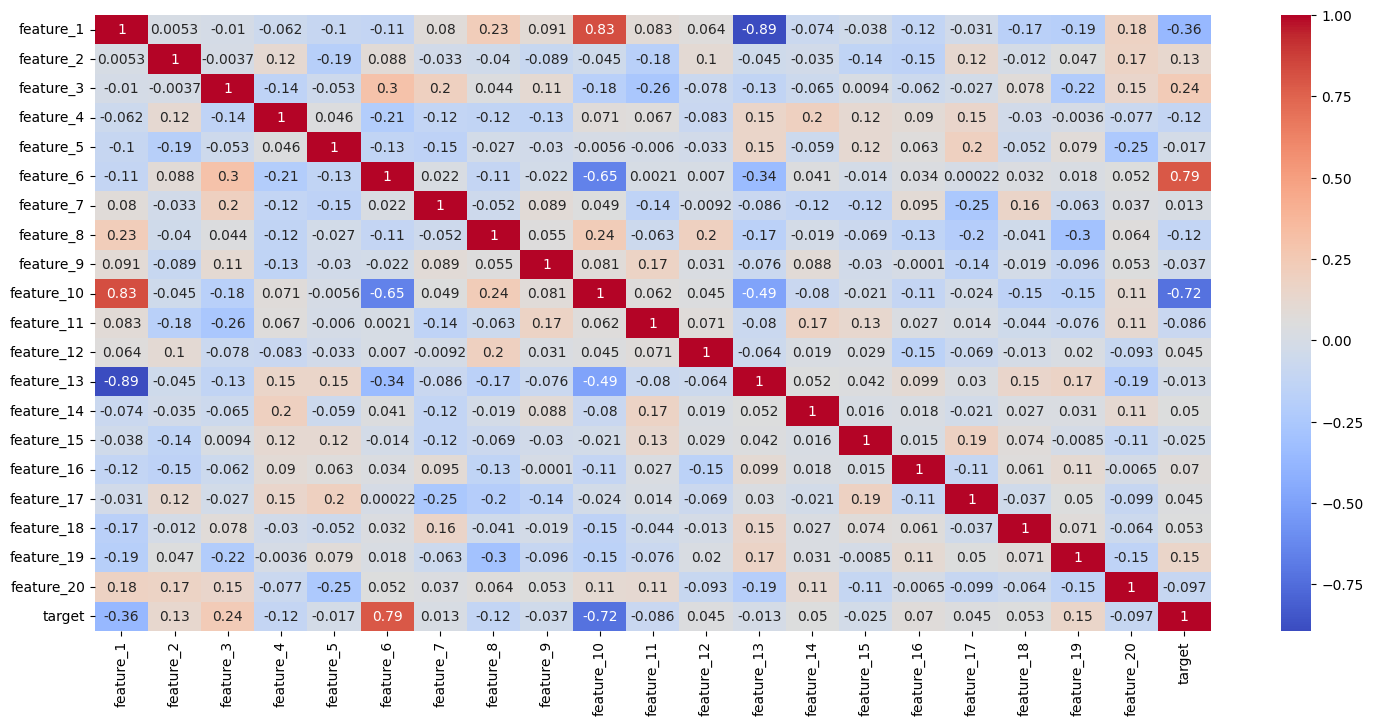

In [ ]:
# Построим матрицу корреляции
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

In [ ]:
# Удаление признаков с высокой корреляцией
def remove_highly_correlated_features(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return data.drop(to_drop, axis=1)

In [ ]:
# Применение фильтрации на тренировочном наборе и обновление тестового набора
X_train_filtered_corr = remove_highly_correlated_features(X_train, threshold=0.9)
X_test_filtered_corr = X_test[X_train_filtered_corr.columns]

In [ ]:
# Количество признаков после удаления коррелированных признаков
num_features_after_corr_removal = X_train_filtered_corr.shape[1]

In [ ]:
num_features_after_corr_removal

20

## b) На основе низкой вариативности

In [ ]:
# Удаление признаков с низкой вариативностью
selector = VarianceThreshold(threshold=0.1)
X_train_filtered_var = selector.fit_transform(X_train_filtered_corr)
X_test_filtered_var = selector.transform(X_test_filtered_corr)

In [ ]:
# Количество признаков после удаления признаков с низкой вариативностью
num_features_after_var_removal = X_train_filtered_var.shape[1]

In [ ]:
num_features_after_var_removal

19

In [ ]:
# Снова строим модель и сравниваем метрикив виде таблицы
filtered_model = LogisticRegression(max_iter=1000)
filtered_metrics = evaluate_model(filtered_model, X_train_filtered_var, y_train, X_test_filtered_var, y_test, 'Filtered Model')
results_table = pd.concat([results_table, pd.DataFrame([filtered_metrics])], ignore_index=True)

In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.9,20
1,Filtered Model,Accuracy,0.942857,0.9,19


Точность на тестовой выборке не поменялась, что может говорить о том, что удаленный признак не был важен для Модели и им действительно можно было пренебречь.

# Шаг 4: Выбор 5 лучших признаков

Используем библиотеку `sklearn` для выбора 5 лучших признаков с помощью скоринговой функции `f_classif`.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Выбор 5 лучших признаков
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Получение выбранных признаков
selected_features = selector.get_support(indices=True)

In [ ]:
selected_features

array([0, 2, 3, 5, 9])

In [ ]:
# МПодставим полученные признаки в Модель
selected_model = LogisticRegression(max_iter=1000)
selected_metrics = evaluate_model(selected_model, X_train_selected, y_train, X_test_selected, y_test, 'Filtered Model (f_classif)')
results_table = pd.concat([results_table, pd.DataFrame([selected_metrics])], ignore_index=True)

In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.9,20
1,Filtered Model,Accuracy,0.942857,0.9,19
2,Filtered Model (f_classif),Accuracy,0.942857,0.9,5


Модель с отбором признаков (`Filtered Model (f_classif)`) показывает на обучающей выборке такую же точночть, что и исходная Модель, при этом на тестовой выборке ее результаты гораздо выше, чнм в предыдущих Моделях. Хотя в рамках данной Модели количество признаков сократилось с 20 до 5.



# 5. Отбор с использованием моделей:

## Шаг 1: Отбор признаков с помощью Логистической Регрессии (L1 регуляризация)

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Обучение модели логистической регрессии с L1 регуляризацией
logistic = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
logistic.fit(X_train.values, y_train)

# Отбор признаков
selector = SelectFromModel(logistic, prefit=True)

# Получаем список отобранных признаков
feature_idx = selector.get_support()
selected_features = X_train.columns[feature_idx]

# Применение трансформации к данным
X_train_l1 = selector.transform(X_train.values)
X_test_l1 = selector.transform(X_test.values)

# Преобразование в DataFrame с именами признаков
X_train_l1 = pd.DataFrame(X_train_l1, columns=selected_features)
X_test_l1 = pd.DataFrame(X_test_l1, columns=selected_features)

# Модель на отобранных признаках
logistic_selected = LogisticRegression(max_iter=1000, random_state=42)
metrics_l1 = evaluate_model(logistic_selected, X_train_l1, y_train, X_test_l1, y_test, 'Logistic Regression (L1)')
results_table = pd.concat([results_table, pd.DataFrame([metrics_l1])], ignore_index=True)

In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.9,20
1,Filtered Model,Accuracy,0.942857,0.9,19
2,Filtered Model (f_classif),Accuracy,0.942857,0.9,5
3,Logistic Regression (L1),Accuracy,0.928571,0.9,11


Результаты Модели после отбора признаков с помощью Логистической регрессии нпо обучающей выборке, как у Filtered Model, а по тестовой - на втором месте.

## Шаг 2: Отбор признаков с помощью RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Модель RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Важность признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[-5:]  # Выбираем 5 самых важных признаков

X_train_rf = X_train.iloc[:, indices]
X_test_rf = X_test.iloc[:, indices]

# Добавим Модель Random Forest в таблицу
logistic_rf = LogisticRegression(max_iter=1000, random_state=42)
metrics_rf = evaluate_model(logistic_rf, X_train_rf, y_train, X_test_rf, y_test, 'RandomForest Selected Features')
results_table = pd.concat([results_table, pd.DataFrame([metrics_rf])], ignore_index=True)

In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.900000,20
1,Filtered Model,Accuracy,0.942857,0.900000,19
2,Filtered Model (f_classif),Accuracy,0.942857,0.900000,5
3,Logistic Regression (L1),Accuracy,0.928571,0.900000,11
4,RandomForest Selected Features,Accuracy,0.914286,0.933333,5


# 6. Перебор признаков:

SequentialFeatureSelector для пошагового отбора признаков с использованием библиотеки `mlxtend`:

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Попробуем прямой выбор функций, постепенно добавляя новые признаки
sfs_forward = SFS(LogisticRegression(max_iter=1000),
                  k_features=5,
                  forward=True,
                  floating=False,
                  scoring='accuracy',
                  cv=5)

# Применение SFS к тренировочным данным
sfs_forward = sfs_forward.fit(X_train, y_train)

# Получение выбранных признаков
selected_features_forward = list(sfs_forward.k_feature_idx_)

# Трансформация данных с использованием выбранных признаков
X_train_sfs_forward = sfs_forward.transform(X_train)
X_test_sfs_forward = sfs_forward.transform(X_test)

# Обучение модели на выбранных признаках и добавление данных в таблицу
sfs_forward_model = LogisticRegression(max_iter=1000)
sfs_forward_metrics = evaluate_model(sfs_forward_model, X_train_sfs_forward, y_train, X_test_sfs_forward, y_test, 'SFS Forward Model')
results_table = pd.concat([results_table, pd.DataFrame([sfs_forward_metrics])], ignore_index=True)

In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.900000,20
1,Filtered Model,Accuracy,0.942857,0.900000,19
2,Filtered Model (f_classif),Accuracy,0.942857,0.900000,5
3,Logistic Regression (L1),Accuracy,0.928571,0.900000,11
4,RandomForest Selected Features,Accuracy,0.914286,0.933333,5
5,SFS Forward Model,Accuracy,0.957143,0.933333,5


SequentialFeatureSelector для пошагового исключения признаков:

In [ ]:
# Попробуем обратный выбор функций, начиная с полного набора и постепенно удаляя  признаки
sfs_backward = SFS(LogisticRegression(max_iter=1000),
                   k_features=5,
                   forward=False,
                   floating=False,
                   scoring='accuracy',
                   cv=5)

# Применение SFS к тренировочным данным
sfs_backward = sfs_backward.fit(X_train, y_train)

# Получение выбранных признаков
selected_features_backward = list(sfs_backward.k_feature_idx_)

# Трансформация данных с использованием выбранных признаков
X_train_sfs_backward = sfs_backward.transform(X_train)
X_test_sfs_backward = sfs_backward.transform(X_test)

# Обучение модели на выбранных признаках и оценка метрик
sfs_backward_model = LogisticRegression(max_iter=1000)
sfs_backward_metrics = evaluate_model(sfs_backward_model, X_train_sfs_backward, y_train, X_test_sfs_backward, y_test, 'SFS Backward Model')
results_table = pd.concat([results_table, pd.DataFrame([sfs_backward_metrics])], ignore_index=True)

In [ ]:
results_table

,Model,Metric,Train,Test,Num Features
0,Initial Model,Accuracy,0.942857,0.900000,20
1,Filtered Model,Accuracy,0.942857,0.900000,19
2,Filtered Model (f_classif),Accuracy,0.942857,0.900000,5
3,Logistic Regression (L1),Accuracy,0.928571,0.900000,11
4,RandomForest Selected Features,Accuracy,0.914286,0.933333,5
5,SFS Forward Model,Accuracy,0.957143,0.933333,5
6,SFS Backward Model,Accuracy,0.957143,0.933333,5


**Initial Model:** показывает высокий результат на тренировочном и тестовом наборах данных, используя все 20 признаков.

**Filtered Model:**
Вторая Модель показывает такой же высокий результат при снижении количества признаков до 19.

**Filtered Model (f_classif):**
Использование статистического метода f_classif для отбора признаков привело к значительному сокращению числа признаков до 5, нопри этом точность на обучающей и тестовой выборках сохранилась на уровне первых двух Моделей.

**Logistic Regression (L1):**
Регуляризация L1 (Lasso) с логистической регрессией эффективно уменьшила количество признаков до 11, по сравнению с предыдущими Моделями немного снизилась точность на обучающей выборке с сохранением точности на тестовой выборке.

**RandomForest Selected Features:**
Отбор признаков с помощью случайного леса также привел к сокращению признаков до 5 и сохранил высокую точность. Он показал точность ниже на обучающей выборке, однако самую высокую на тестовой выборке.

**SFS Forward Model:**
Метод пошагового подбора признаков по направлению вперёд (SFS Forward) снизил количество признаков до 5. Также у данного метода максимальная точность как на обучающей, так и на тестовой выборке.


**SFS Backward Model:**
Метод пошагового подбора признаков по направлению назад (SFS Backward) также уменьшил количество признаков до 5 и сохранил высокую точность, аналогичную SFS Forward.


### Выводы:
1. Все модели показывают достаточно высокую точность. Независимо от метода отбора признаков, модели демонстрируют высокую точность на тренировочном и тестовом наборах данных.
2. Эффективность уменьшения признаков. Методы отбора, такие как f_classif, L1 регуляризация значительно снижают количество признаков, подаваемых в Модель: с 20 до 5-11, при этом не теряя точность. Это говорит об их эффективности в выделении наиболее значимых признаков.
Самые высокие показатели точности (одинаковые) у SFS Forward Model  и SFS Backward Model.